In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [6]:
import requests

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=694d2c62515cf151db30f9d4ff1cb366


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list (6.2.6)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                    
    # If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount gambier
Processing Record 2 of Set 1 | sola
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | viedma
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | nguiu
City not found. Skipping...
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | mount isa
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | nouadhibou
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | estelle
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 

Processing Record 37 of Set 4 | anloga
Processing Record 38 of Set 4 | luderitz
Processing Record 39 of Set 4 | cayenne
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | mercedes
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | donskoye
Processing Record 44 of Set 4 | del rio
Processing Record 45 of Set 4 | shunyi
Processing Record 46 of Set 4 | shushtar
Processing Record 47 of Set 4 | namatanai
Processing Record 48 of Set 4 | pamanukan
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | ahipara
Processing Record 2 of Set 5 | samarai
Processing Record 3 of Set 5 | rocha
Processing Record 4 of Set 5 | spitsevka
Processing Record 5 of Set 5 | augusto correa
Processing Record 6 of Set 5 | bahawalpur
Processing Record 7 of Set 5 | norman wells
Processing Record 8 of Set 5 | washougal
Processing Record 9 of Set 5 | chernyshevskiy
Processing Record 10 of Set 5 | 

Processing Record 29 of Set 8 | goderich
Processing Record 30 of Set 8 | gornopravdinsk
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | tonstad
Processing Record 33 of Set 8 | sangueya
Processing Record 34 of Set 8 | vung tau
Processing Record 35 of Set 8 | salmon arm
Processing Record 36 of Set 8 | biritiba-mirim
Processing Record 37 of Set 8 | moose factory
Processing Record 38 of Set 8 | sungairaya
Processing Record 39 of Set 8 | roald
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | fredericton
Processing Record 42 of Set 8 | margate
Processing Record 43 of Set 8 | springbok
Processing Record 44 of Set 8 | karasburg
Processing Record 45 of Set 8 | muisne
Processing Record 46 of Set 8 | oktyabrskoye
Processing Record 47 of Set 8 | pokosnoye
Processing Record 48 of Set 8 | the valley
Processing Record 49 of Set 8 | salinopolis
Processing Record 50 of Set 8 | khani
Processing Record 1 of Set 9 | torbay
Processing Record 2 of Set 9 | pa

City not found. Skipping...
Processing Record 20 of Set 12 | kavaratti
Processing Record 21 of Set 12 | ust-nera
Processing Record 22 of Set 12 | sijunjung
Processing Record 23 of Set 12 | alpena
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | bontang
Processing Record 26 of Set 12 | svetlaya
Processing Record 27 of Set 12 | talnakh
Processing Record 28 of Set 12 | kenai
Processing Record 29 of Set 12 | mahaicony
City not found. Skipping...
Processing Record 30 of Set 12 | ambovombe
Processing Record 31 of Set 12 | bom jesus
Processing Record 32 of Set 12 | sao jose da coroa grande
Processing Record 33 of Set 12 | kawalu
Processing Record 34 of Set 12 | penzance
Processing Record 35 of Set 12 | beyneu
Processing Record 36 of Set 12 | nokaneng
Processing Record 37 of Set 12 | alexandria
Processing Record 38 of Set 12 | payo
Processing Record 39 of Set 12 | pervomayskoye
Processing Record 40 of Set 12 | sioux lookout
Processing Record 41 of Set 12 | idaho 

In [11]:
len(city_data)

566

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.77,45.97,96,0,3.78,AU,2020-10-28 13:10:51
1,Sola,-13.88,167.55,80.33,75,0,15.75,VU,2020-10-28 13:10:51
2,Rikitea,-23.12,-134.97,74.53,83,100,15.82,PF,2020-10-28 13:10:52
3,Viedma,-40.81,-63.00,64.00,38,0,5.99,AR,2020-10-28 13:10:52
4,Vaini,-21.20,-175.20,73.33,68,0,18.54,TO,2020-10-28 13:10:52
5,Geraldton,-28.77,114.60,64.99,73,0,1.01,AU,2020-10-28 13:10:52
6,Lebu,-37.62,-73.65,52.21,79,0,7.85,CL,2020-10-28 13:10:53
7,Mataura,-46.19,168.86,45.00,90,82,3.00,NZ,2020-10-28 13:10:53
8,Hobart,-42.88,147.33,44.62,87,12,2.64,AU,2020-10-28 13:06:58
9,Mount Isa,-20.73,139.50,75.25,17,0,9.48,AU,2020-10-28 13:10:54


In [13]:
# Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Gambier,AU,2020-10-28 13:10:51,-37.83,140.77,45.97,96,0,3.78
1,Sola,VU,2020-10-28 13:10:51,-13.88,167.55,80.33,75,0,15.75
2,Rikitea,PF,2020-10-28 13:10:52,-23.12,-134.97,74.53,83,100,15.82
3,Viedma,AR,2020-10-28 13:10:52,-40.81,-63.00,64.00,38,0,5.99
4,Vaini,TO,2020-10-28 13:10:52,-21.20,-175.20,73.33,68,0,18.54
5,Geraldton,AU,2020-10-28 13:10:52,-28.77,114.60,64.99,73,0,1.01
6,Lebu,CL,2020-10-28 13:10:53,-37.62,-73.65,52.21,79,0,7.85
7,Mataura,NZ,2020-10-28 13:10:53,-46.19,168.86,45.00,90,82,3.00
8,Hobart,AU,2020-10-28 13:06:58,-42.88,147.33,44.62,87,12,2.64
9,Mount Isa,AU,2020-10-28 13:10:54,-20.73,139.50,75.25,17,0,9.48


In [14]:
# Create the output file (CSV).
output_data_file = "Weather_Data/Cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
############################################################################################################################

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603890783.3119845

In [18]:
# Convert using the string format method
today = time.strftime("%x")
today

'10/28/20'

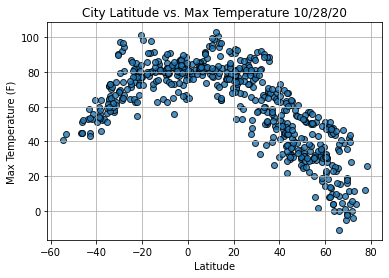

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

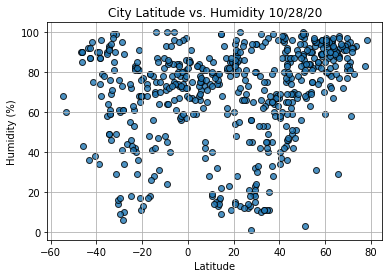

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

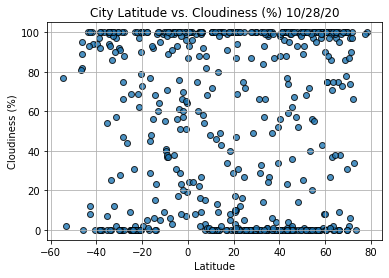

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

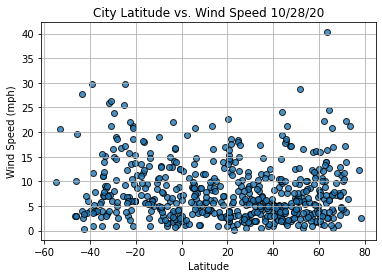

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
from scipy.stats import stats

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

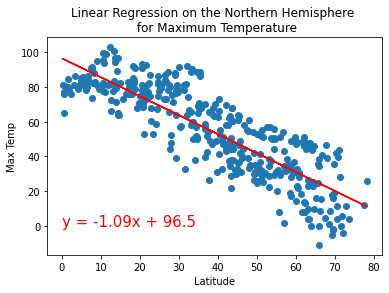

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp",(0,0))

In [40]:
stats.linregress(x_values,y_values)

LinregressResult(slope=-1.091385129072248, intercept=96.49952905972722, rvalue=-0.8533315414747367, pvalue=2.2132198035518307e-110, stderr=0.03407263873650895)

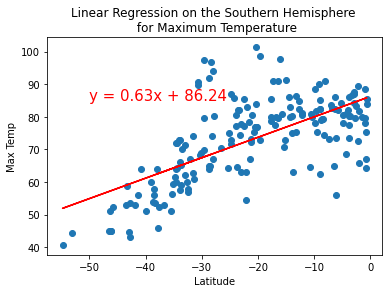

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

In [42]:
stats.linregress(x_values,y_values)

LinregressResult(slope=0.6266708466472212, intercept=86.24381820374396, rvalue=0.6562395143548903, pvalue=1.1512158539170449e-23, stderr=0.05385675055423973)

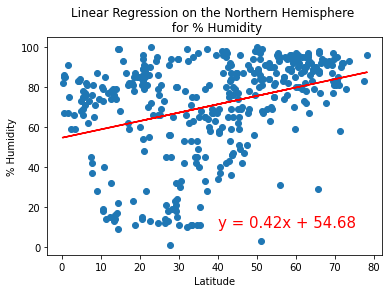

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [45]:
stats.linregress(x_values,y_values)

LinregressResult(slope=0.4192589731637379, intercept=54.67605870453005, rvalue=0.34132587795251873, pvalue=5.847308146367654e-12, stderr=0.05899513723207831)

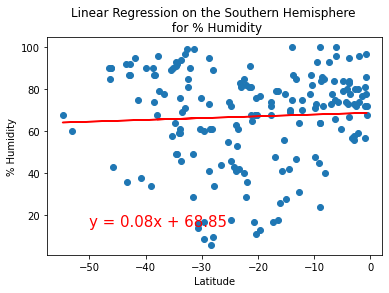

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [47]:
stats.linregress(x_values,y_values)

LinregressResult(slope=0.08459544497028157, intercept=68.84908470139719, rvalue=0.05005490693632497, pvalue=0.5033844858191703, stderr=0.12616214424799152)

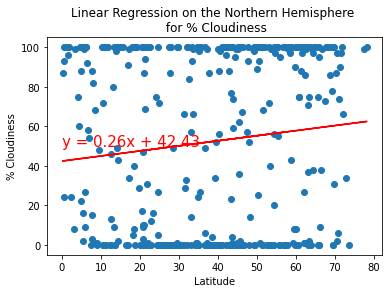

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,50))

In [49]:
stats.linregress(x_values,y_values)

LinregressResult(slope=0.2562455717924878, intercept=42.4314163043235, rvalue=0.11492966473024212, pvalue=0.02411902418503323, stderr=0.1131716036927163)

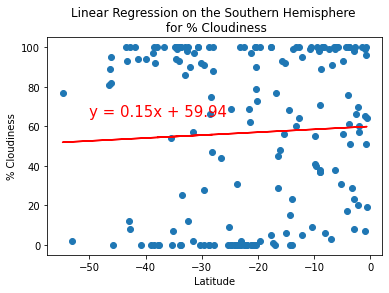

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,65))

In [52]:
stats.linregress(x_values,y_values)

LinregressResult(slope=0.1464658427173285, intercept=59.93897205985507, rvalue=0.04789516691807019, pvalue=0.5219990772115493, stderr=0.22830711788905722)

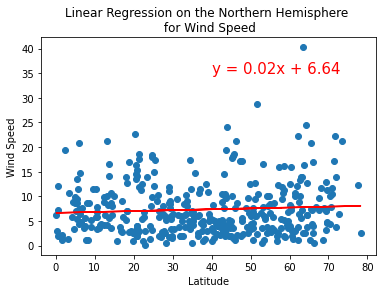

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [54]:
stats.linregress(x_values,y_values)

LinregressResult(slope=0.01805038208489916, intercept=6.640505119934951, rvalue=0.06671496822540843, pvalue=0.19147048046799253, stderr=0.013794154111829968)

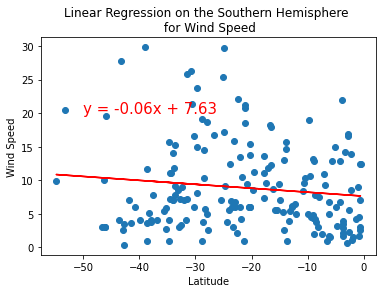

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

In [57]:
stats.linregress(x_values,y_values)

LinregressResult(slope=-0.05881354792443848, intercept=7.628422245257302, rvalue=-0.12335550570021976, pvalue=0.09804514747583405, stderr=0.03536410646426812)